# About Dataset

The train data contains 200 rows of data and 2 columns, as follows:

- Text: This column contains data extracted from documents, which can be quite messy.
- Label: This column contains the category that the text belongs to. There are only two categories: 1 and 0.
    - 1 : Reliable
    - 0 : Unreliable

#### Objective: 
- To train an algorithm that can classify the text into their correct label and then functionalize this algorithm so that you can pass a text into this function and it returns the Label of the text.


### Importing the libraries

In [1]:

# Data Analysis Modules
from wordcloud import WordCloud, STOPWORDS
import re # RegEx or Regular Expression, is used to check if a string contains the specified search pattern.
import string # Used for string manipulations without changing the original string
import pandas as pd # use for Dataset manipulation
import numpy as np # Used for numerical dataset manipulation
import seaborn as sns # used for creating visuals (charts or plots)
import matplotlib.pyplot as plt # used for creating visuals (charts or plots)

######## Deep Learning Modules ###########

# Natural Language Processing (NLP) Modules
import nltk # Natural Language Tool Kit
nltk.download('punkt')
nltk.download('stopwords') # Download nltk stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud # Used for building a word cloud for most used words
from nltk.corpus import stopwords    # nltk -- natural language tool lit : ==> stopwords means those words that do not have much effect to our processing
from nltk.stem import PorterStemmer   # gives the root word about our words
nltk.download('omw-1.4') # gives access to the Open Multilingual WordNet
nltk.download('wordnet') # gives access to the Open Multilingual WordNet, using ISO-639 language codes. Used for downloading stopwords for lemmatization
from nltk.stem import WordNetLemmatizer # Used for converting some words to their root words (example, acting --> act)
from nltk.tokenize import word_tokenize # Tokenizer used for splitting sentences into list(words)
#

# Machine Learning Modules
from sklearn.model_selection import train_test_split # used for spliting the dataser into training data and testing data
from sklearn.metrics import accuracy_score # used for evaluating the machine learning model to know the performance efficiency of the model
from sklearn.metrics import classification_report # used for maching learning model evaluation
from sklearn.feature_extraction.text import TfidfVectorizer # use to convert text in features data
from sklearn.linear_model import LogisticRegression # machine learning model used for building a predicitve model
from sklearn.tree import DecisionTreeClassifier # machine learning model used for building a predicitve model
from sklearn.ensemble import GradientBoostingClassifier # machine learning model used for building a predicitve model
from sklearn.ensemble import RandomForestClassifier # machine learning model used for building a predicitve model
import pickle # Used for saving predictive model as a dump file

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading omw-1.4: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


#### Loading in the Train Dataset

In [2]:
# Loading the train dataset
df_train = pd.read_csv('Train Data_Copy.csv', index_col=0)

# print out the first five rows
df_train.head()

,Text,Label
0,MARCH 2010 This publication was produced for ...,1.0
1,Capacity Building Evidence Ownership Health Sy...,1.0
2,Report of the External Evaluation Team (EET) ...,1.0
3,USAID/Kenya Primary Math and Reading (PRIMR) ...,1.0
4,Final Evaluation of the Land Conflict Resolut...,1.0


In [3]:
df_train.shape

(200, 2)

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Text    200 non-null    object 
 1   Label   200 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.7+ KB


In [5]:
# checking for missing values
df_train.isna().sum()

Text     0
Label    0
dtype: int64

In [6]:
# getting a distinct count of values in the 'Label' column
df_train['Label'].value_counts()

1.0    100
0.0    100
Name: Label, dtype: int64

#### Loading in the Test datasets

In [7]:
# Loading in the test dataset
df_testo = pd.read_csv('Test_Data.csv', index_col=0)
df_test = df_testo

df_test.head()

,Text,Label
0,FINAL PERFORMANCE EVALUATION OF THE FEED THE...,NaN
1,19TH QUARTERLY PERFORMANCE REPORT Management ...,NaN
2,A DIGITAL APPROACH FOR TARGETED MALARIA TREAT...,NaN
3,Baseline Survey Report For the FTF Agricultur...,NaN
4,December 2021 This document was produced at t...,NaN


In [8]:
# Getting the number of rows and columns
df_test.shape

(50, 2)

In [9]:
# Getting the info of the dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Text    50 non-null     object 
 1   Label   0 non-null      float64
dtypes: float64(1), object(1)
memory usage: 1.2+ KB


In [10]:
# checking if there are missing values
df_test.isna().sum()

Text      0
Label    50
dtype: int64

In [11]:
# Dropping the empty 'Label' column
df_test.drop(columns='Label', axis=1, inplace=True)
df_test.head(3)

,Text
0,FINAL PERFORMANCE EVALUATION OF THE FEED THE...
1,19TH QUARTERLY PERFORMANCE REPORT Management ...
2,A DIGITAL APPROACH FOR TARGETED MALARIA TREAT...


# Data Cleaning and Preprocessing

#### Steming :
This process involves;
1. Removing special characters (such as @/!\&%$#*())
2. Reducing words to its word stem that affixes to suffixes and prefixes or the roots.
    - example:
        - actor,  actress, acting ---> act
        - attraction --> attract

In [12]:
# Assigning the PorterStemmer() to a variable

#port_stem = PorterStemmer() 
lemmatizer = WordNetLemmatizer()

In [13]:
twit = df_train['Text']

# Writing a stemmer function

def stemming(twit):   # creating a function called steaming
    stemmed_content = re.sub('[^a-zA-Z0-9]',' ', twit) # remoing characters
    stemmed_content = re.sub('\[.*?\]', '', stemmed_content)
    stemmed_content = re.sub("\\W", " ",  stemmed_content)
    stemmed_content = re.sub('https?://\S+|www\.\S+', '', stemmed_content)
    stemmed_content = re.sub(r"https\S+|www\S+https\S+", '', stemmed_content, flags=re.MULTILINE)
    stemmed_content = re.sub('<.*?>+', '', stemmed_content)
    stemmed_content = re.sub('[%s]' % re.escape(string.punctuation), '', stemmed_content)
    stemmed_content = re.sub('\n', '', stemmed_content)
    stemmed_content = re.sub('\w*\d\w*', '', stemmed_content)
    stemmed_content = stemmed_content.lower() # converting all the words to lower case
    stemmed_content = stemmed_content.split() # splitting the words and converting it to list
    #stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')] # performing steming; reducing each word to its root word and also removing the stop words
    stemmed_content = [lemmatizer.lemmatize(word) for word in stemmed_content if not word in stopwords.words('english')] # performing steming; reducing each word to its root word and also removing the stop words
    stemmed_content = ' '.join(stemmed_content) # joining the words 
    return stemmed_content

In [14]:
# df_train['Text'] = df_train.apply(lambda row: nltk.word_tokenize(row['Text']), axis=1)

In [15]:
# Applying stemmer to the Train Data

df_train['Text'] = df_train['Text'].apply(stemming)

In [18]:
# Applying stemmer to the Test Data

df_test['Text'] = df_test['Text'].apply(stemming)

In [19]:
# data cleaning function to remove special characters using RegEx
def wordopt(text):
    text = text.lower()
    text = re.sub('[^a-zA-Z0-9]',' ', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W", " ",  text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub(r"https\S+|www\S+https\S+", '', text, flags=re.MULTILINE)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [20]:
#df_train['Text'] = df_train['Text'].apply(wordopt) # applying wordopt to train data 'Text'

In [21]:
#df_test['Text'] = df_test['Text'].apply(wordopt) # applying wordopt to test data 'Text'

In [22]:
# Eztracting the values and assign it to x and y variables
x = df_train['Text'].values
y = df_train['Label'].values


# Exploratory Data Analysis - EDA

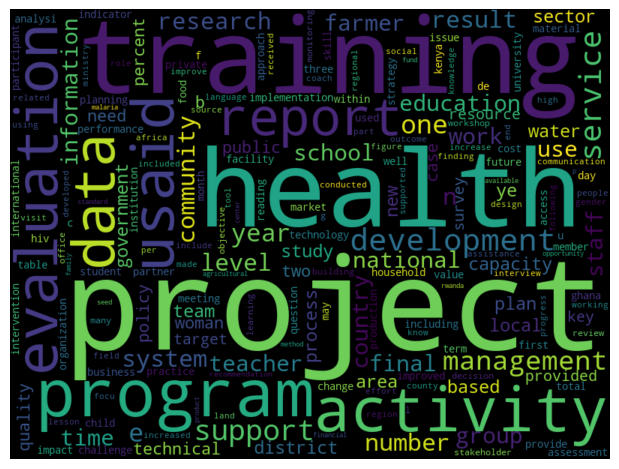

Fig.1 Reliable Data Wordcloud


In [23]:
# A wordcloud to show the most predominant words

# This wordcloud is for Reliable articles with label = 1.
stopwords = set(STOPWORDS)

real = df_train[df_train['Label'] == 1.0]
all_words = ' '.join([text for text in real.Text])

wordcloud = WordCloud(width = 800, height = 600,
                     stopwords = stopwords,
                     min_font_size = 6,
                     collocations = False).generate(all_words)

# plot the wordcloud image
plt.figure(figsize = (6,6), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()
print('Fig.1 Reliable Data Wordcloud')

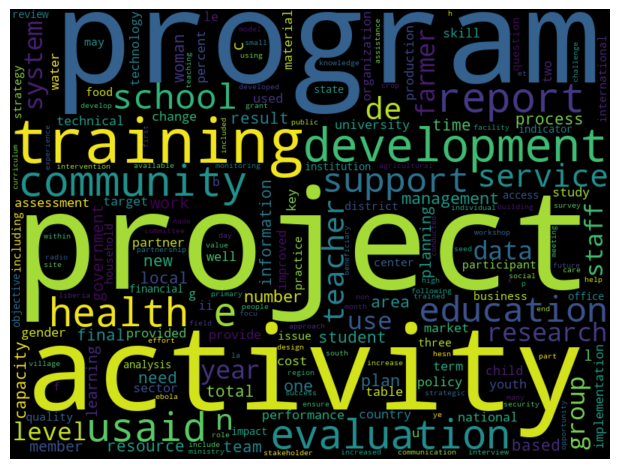

Fig.2 Unreliable Data Wordcloud


In [24]:
# A wordcloud to show the most predominant words

# This wordcloud is for unreliable articles with label = 0.
stopwords = set(STOPWORDS)

unreliable = df_train[df_train['Label'] == 0.0]
all_words = ' '.join([text for text in unreliable.Text])

wordcloud = WordCloud(width = 800, height = 600,
                     stopwords = stopwords,
                     min_font_size = 8,
                     collocations = False).generate(all_words)

# plot the wordcloud image
plt.figure(figsize = (6,8), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()
print('Fig.2 Unreliable Data Wordcloud')

# Building the predictive models

The following Machine Learning (ML) Models were used to build the predictive model;
- Logistic Regression
- Decision Tree Classifier
- Gradient Boosting Classifier
- Random Forest Classifier

The model with higher efficiency was used for prediction. This was performed using the 'if' function

NB: We are using more than 1 ML models because each model performs differently with the dataset, and we want use the model with the best performance for prediction.

In [25]:
# Splitting the x & y data to train and test data

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42)

In [26]:
# Converting the texts to numerical data using vectorizer
vectorizer = TfidfVectorizer()

# Applying vectorizer to the data (x_train & x_test)
xv_train = vectorizer.fit_transform(x_train)
xv_test = vectorizer.transform(x_test)

#### Standardizing the Dataset

The Standard Scaling function is used to normalize the dataset into the same scale, hence, creating uniformity. We use Gradient Descent - Gradient Descent is an optimization algorithm for finding a local minimum of a differentiable function. The aim is to create uniformity and conformity to a global minimal while also creating uniformity in our independent data.

NB: This will help optimize and improve the efficiency of the model.

In [27]:
# importing standard scaling module
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)

In [28]:
# Performing standard scaling scaling on the x_train dataset
xv_train = scaler.fit_transform(xv_train)

# Performing standard scaling on the x_test dataset
xv_test = scaler.transform(xv_test)

#### LogisticRegression() Model

In [37]:
# Logistic Regression
LR = LogisticRegression()

# Training the model
LR.fit(xv_train, y_train)

LogisticRegression()

In [38]:
# Train data evaluation

# Making Prediction for trained data
lr_pred_train = LR.predict(xv_train)

# Evaluating the model using accuracy_score
training_score_accuracy = accuracy_score(lr_pred_train, y_train)
print(f'Accuracy score for the trained data : {round(training_score_accuracy,2)*100}%')

# Assigning the efficiency to a variable
lr_evltn = round(training_score_accuracy,2)*100 

Accuracy score for the trained data : 100.0%


In [43]:
# Test data evaluation

# Making Prediction for test data
lr_pred_test = LR.predict(xv_test)

# Evaluating the model using accuracy_score
test_score_accuracy = accuracy_score(lr_pred_test, y_test)
print(f'Accuracy score for the test data : {round(test_score_accuracy,2)*100}%')

# Assigning the efficiency to a variable
lr_evltn_test = round(test_score_accuracy,2)*100 

Accuracy score for the test data : 56.00000000000001%


In [ ]:
# Using other Model Evaluators

## Evaluating the model using confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, lr_pred_test)

In [ ]:
# Model Evaluation using classification_report
print(classification_report(y_train, lr_pred_train))

#### DecisionTreeClassifier() Model

In [ ]:
# Decision Tree Model

DT = DecisionTreeClassifier(criterion='entropy')

# Training the model
DT.fit(xv_train, y_train)

In [ ]:
# Making Prediction with Deecision Tree Model
DT_pred = DT.predict(xv_train)

# Evaluating the model using accuracy_score
training_score_accuracy = accuracy_score(DT_pred, y_train)
print(f'Accuracy score for the trained data : {round(training_score_accuracy,2)*100}%')

dt_evltn = round(training_score_accuracy,2)*100  # Assigning the efficiency to a variable

In [ ]:
# Making Prediction for test data
dt_pred_test = DT.predict(xv_test)


# Evaluating the model using accuracy_score
test_score_accuracy = accuracy_score(dt_pred_test, y_test)
print(f'Accuracy score for the test data : {round(test_score_accuracy,2)*100}%')

# Assigning the efficiency to a variable
dt_evltn_test = round(test_score_accuracy,2)*100 

In [ ]:
# Model Evaluation using classification_report
print(classification_report(y_train, DT_pred))

#### GradientBoostingClassifier() Model

In [ ]:
# Building Gradient boost Model
GBC = GradientBoostingClassifier(random_state = 0)

# Training the model
GBC.fit(xv_train, y_train)

In [ ]:
# Making Prediction with Gradient Boost Classifier Model
GBC_pred = GBC.predict(xv_train)

# Evaluating the model using accuracy_score
training_score_accuracy = accuracy_score(GBC_pred, y_train)
print(f'Accuracy score for the trained data : {round(training_score_accuracy,2)*100}%')

gbc_evltn = round(training_score_accuracy,2)*100  # Assigning the efficiency to a variable

In [ ]:
# Making Prediction for test data
gbc_pred_test = GBC.predict(xv_test)


# Evaluating the model using accuracy_score
test_score_accuracy = accuracy_score(gbc_pred_test, y_test)
print(f'Accuracy score for the test data : {round(test_score_accuracy,2)*100}%')

# Assigning the efficiency to a variable
gbc_evltn_test = round(test_score_accuracy,2)*100 

In [ ]:
# Model Evaluation using classification_report
print(classification_report(y_train, GBC_pred))

#### RandomForestClassifier() Model

In [ ]:
# Building Random Forest Classifier Model
RFC = RandomForestClassifier(random_state = 0)

# Training the model
RFC.fit(xv_train, y_train)

In [ ]:
# Making Prediction with Gradient Boost Classifier Model
RFC_pred = RFC.predict(xv_train)

# Evaluating the Model
training_score_accuracy = accuracy_score(RFC_pred, y_train)
print(f'Accuracy score for the trained data : {round(training_score_accuracy,2)*100}%')

rfc_evltn = round(training_score_accuracy,2)*100  # Assigning the efficiency to a variable

In [ ]:
# Making Prediction for test data
rfc_pred_test = RFC.predict(xv_test)


# Evaluating the model using accuracy_score
test_score_accuracy = accuracy_score(rfc_pred_test, y_test)
print(f'Accuracy score for the test data : {round(test_score_accuracy,2)*100}%')

# Assigning the efficiency to a variable
rfc_evltn_test = round(test_score_accuracy,2)*100 

## Prediction on the Test Dataset

In [ ]:
# Load in the Test Dataset
df_test.head()

In [ ]:
df_test.shape

In [ ]:
# Test Data Prediction Function

# Using the 'if' function, the machine learning model with the highest test data efficiency will be used to make prediction on the "Test Dataset".

def testDatasetPred():
    x_test_value = df_test['Text'].values

    # Applying vectorizer to the text columns
    xv_test_value = vectorizer.transform(x_test_value)

    # Performing standard scaling on the x_test dataset
    xs_test_value = scaler.transform(xv_test_value)

    # Evaluation function for the test data model
    def evaluation(pred):
        test_score_accuracy = accuracy_score(pred, y_test)
        print(f'Accuracy score for the test data : {round(test_score_accuracy,2)*100}%')

    # With the 'if' function, prediction was made on the test dataset with the highest perrforming ML model i.e. model with highest efficiency
    if ((lr_evltn_test > dt_evltn_test) & (lr_evltn_test > gbc_evltn_test) & (lr_evltn_test > rfc_evltn_test)):
        prediction = LR.predict(xs_test_value)
        df_testo['Label'] = prediction # Adding the prediction outcome as a columns to the original "Test Dataset"
        df_testo['Label_Description'] = np.where(df_testo['Label'] == 1.0, 'Reliable', 'Unreliable') # Adding 'Lable_Description' column
        evaluation(prediction)
        pickle.dump(vectorizer, open('vectorizer.pkl', 'wb')) # Saving the vectorizer as a pickle dump
        pickle.dump(LR, open('PredModel.pkl', 'wb')) # Saving the predictive model as a pickle dump
        print('From LogisticRegression Model')
    elif ((dt_evltn_test > lr_evltn_test) & (dt_evltn_test > gbc_evltn_test) & (dt_evltn_test > rfc_evltn_test)):
        prediction = DT.predict(xs_test_value)
        df_testo['Label'] = prediction # Adding the prediction outcome as a columns to the original "Test Dataset"
        df_testo['Label_Description'] = np.where(df_testo['Label'] == 1.0, 'Reliable', 'Unreliable') # Adding 'Lable_Description' column
        evaluation(prediction)
        pickle.dump(vectorizer, open('vectorizer.pkl', 'wb')) # Saving the vectorizer as a pickle dump
        pickle.dump(DT, open('PredModel.pkl', 'wb')) # Saving the predictive model as a pickle dump
        print('From DecisionTreeClassifier Model')
    elif ((gbc_evltn_test > lr_evltn_test) & (gbc_evltn_test > dt_evltn_test) & (gbc_evltn_test > rfc_evltn_test)):
        prediction = GBC.predict(xs_test_value)
        df_testo['Label'] = prediction # Adding the prediction outcome as a columns to the original "Test Dataset"
        df_testo['Label_Description'] = np.where(df_testo['Label'] == 1.0, 'Reliable', 'Unreliable') # Adding 'Lable_Description' column
        evaluation(prediction)
        pickle.dump(vectorizer, open('vectorizer.pkl', 'wb')) # Saving the vectorizer as a pickle dump
        pickle.dump(GBC, open('PredModel.pkl', 'wb')) # Saving the predictive model as a pickle dump
        print('From GradientBoostClassifier Model')
    else:
        prediction = RFC.predict(xs_test_value)
        df_testo['Label'] = prediction # Adding the prediction outcome as a columns to the original "Test Dataset"
        df_testo['Label_Description'] = np.where(df_testo['Label'] == 1.0, 'Reliable', 'Unreliable') # Adding 'Lable_Description' column
        evaluation(prediction)
        pickle.dump(vectorizer, open('vectorizer.pkl', 'wb')) # Saving the vectorizer as a pickle dump
        pickle.dump(RFC, open('PredModel.pkl', 'wb')) # Saving the predictive model as a pickle dump
        print('From RandomForest Model')

testDatasetPred()

In [ ]:
# getting the final test dataset
df_testo.head()

In [ ]:
df_testo['Label'].value_counts() # discrete count of the predictive outcome

In [ ]:
plt.figure(figsize= (6,4))
plt.title('Prediction Outcome')

sns.countplot(x='Label_Description', data=df_testo);

In [ ]:
# Saving the test data and prediction as a csv file.

df_testo.to_csv("test_data_with_prediction.csv", encoding='utf-8', index = False)

# Designing a prediction function model

This function can be used to predict external articles.

In [ ]:
#x_new = x_test[0] #input("Enter text here")

def model():
    def output_label(n):
        if n == 0.0:
            return 'Unreliable Article'
        elif n == 1.0:
            return 'Reliable Article'
    
    x_new = input("Enter text here") # recieves text from user
    testing_news = {'text': [x_new]} # creating a dictionary key
    news = pd.DataFrame(testing_news) # converting the dictionary to a DataFrame

    x_new = news['text'].apply(wordopt) # apply wordopt function the the text
    x_new = vectorizer.transform(x_new) # vectorizing - convert the text data to numeric data
    x_new = scaler.transform(x_new) # standardization of the text - creating uniformity
    
    
    ######## Comparing the efficiency of the model. ########
    if ((lr_evltn_test > dt_evltn_test) & (lr_evltn_test > gbc_evltn_test) & (lr_evltn_test > rfc_evltn_test)): #
        prediction = LR.predict(x_new)
        print(f'prediction = {prediction}')
    elif ((dt_evltn_test > lr_evltn_test) & (dt_evltn_test > gbc_evltn_test) & (dt_evltn_test > rfc_evltn_test)):
        prediction = DT.predict(x_new)
        print(f'prediction = {prediction}')
    elif ((gbc_evltn_test > lr_evltn_test) & (gbc_evltn_test > dt_evltn_test) & (gbc_evltn_test > rfc_evltn_test)):
        prediction = GBC.predict(x_new)
        print(f'prediction = {prediction}')
    else:
        prediction = RFC.predict(x_new)
        print(f'prediction = {prediction}')

    print(output_label(prediction))
    
model()